# Visualization

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [219]:
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [220]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


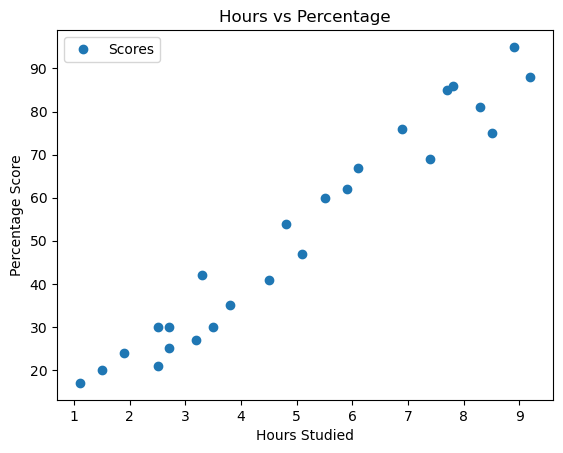

In [221]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [222]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt

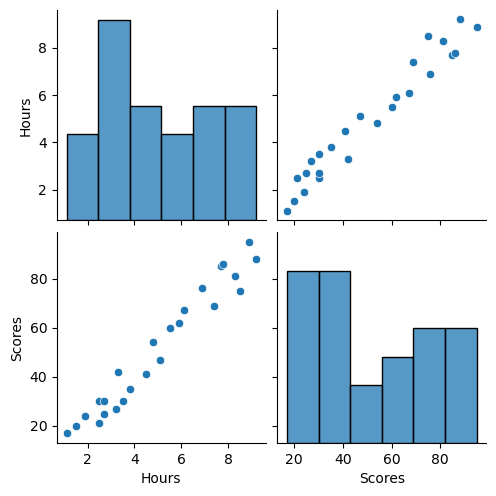

In [224]:
sns.pairplot(df)

<AxesSubplot:ylabel='Count'>

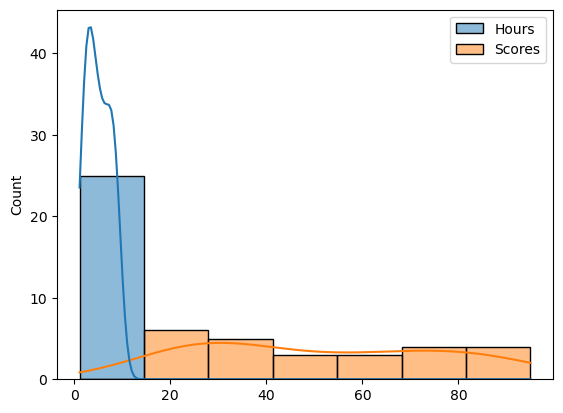

In [225]:
sns.histplot(df,label="Hours,Scores",kde="True")

# Preparing the data

In [226]:
 ## diving the dataset into depending and independent features
X = df.iloc[:, :-1].values  
y =df.iloc[:, 1].values 

In [227]:
 from sklearn.model_selection import train_test_split
#split the data qet into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split (X.reshape(-1,1), y,test_size=0.2, random_state=0)

# Training the Data

In [228]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [229]:
X_train=scaler.fit_transform(X_train)

In [230]:
X_test=scaler.transform(X_test)

In [231]:
## Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [232]:
mse=cross_val_score(lin_reg,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [233]:
np.mean(mse)

-39.27427425176028

In [234]:
reg_pred=lin_reg.predict(X_test)

In [235]:
X_train

array([[-0.57932795],
       [-1.34371899],
       [ 1.02991635],
       [ 0.66783639],
       [-1.66556785],
       [-0.05632355],
       [ 0.98968525],
       [-0.78048349],
       [ 1.23107189],
       [ 1.59315186],
       [ 0.34598753],
       [-0.70002127],
       [-1.02187013],
       [ 0.10460088],
       [-1.02187013],
       [ 1.31153411],
       [-1.10233235],
       [-0.17701687],
       [ 1.47245854],
       [-0.2977102 ]])

In [236]:
reg_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

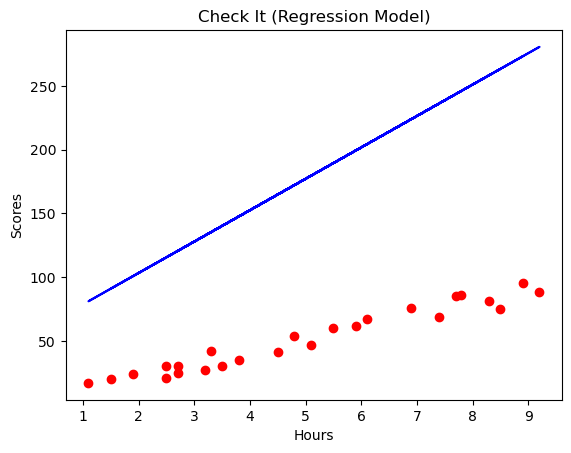

In [237]:
plt.scatter(X, y, color = 'red')
plt.plot(X,lin_reg.predict(X), color = 'blue')
plt.title('Check It (Regression Model)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

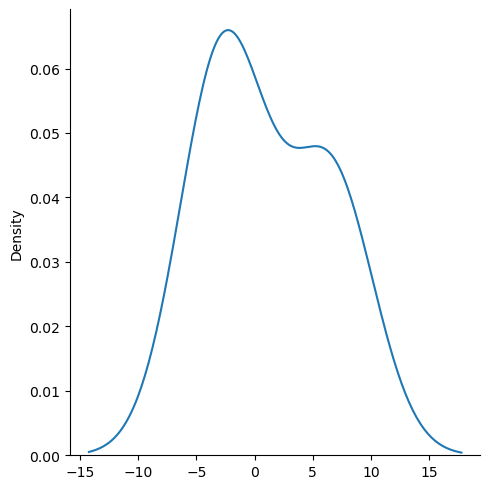

In [238]:
sns.displot(reg_pred-y_test,kind="kde")

In [239]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': reg_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [240]:
from sklearn.metrics import r2_score

In [241]:
score=r2_score(reg_pred,y_test)

In [242]:
score

0.9546785947197246

# Result

In [243]:
X_train=np.array([[9.25]])

In [251]:
X_train=scaler.transform(X_train)

In [252]:
reg_pred=lin_reg.predict(X_train)

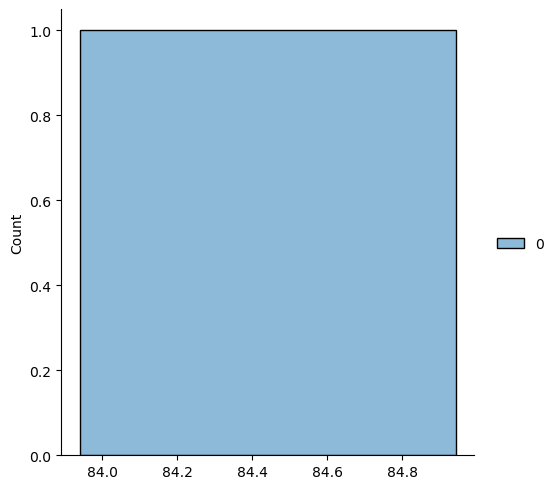

In [253]:
import seaborn as sns
sns.displot(reg_pred-test_arr,kind="hist")

In [255]:
print("In 9.25 Hours student will score:",reg_pred,"Marks")

In 9.25 Hours student will score: [93.69173249] Marks
